# Laboratorio 7: MÉTODO GRÁFICO. GRÁFICO DE LAS RESTRICCIONES. OPTIMIZACIÓN DE LA FUNCIÓN OBJETIVO. ANÁLISIS DE SENSIBILIDAD

## Integrantes:

- Cervera Vasquez, Eslin Yair
- Escriba Flores, Daniel Agustin

---

In [1]:
## Importamos las librerias necesarias 

# Instalamos las librerías necesarias
#!pip install shapely

import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from IPython.display import Image 

# ================================
import warnings
warnings.filterwarnings('ignore')

---

## PROBLEMATICA

Una empresa fabrica únicamente tapas y envases. Cada lote de tapas requiere de 1 litro de barniz y 5 minutos en el horno, mientras que cada lote de envases requiere de 2 litros de barniz y 3 minutos en el horno. Semanalmente se dispone de 1000 litros de barniz y 3000 minutos en el horno. Por restricciones de infraestructura, la producción semanal entre los dos productos, es como mucho, de 650 lotes. Además, si la empresa vende todo lo que fabrica, gana por cada lote de tapas fabricado `$ 3000` y por cada lote de envases `$ 2000`

---

## Parte A
Escriba el problema de programación lineal que maximice la ganancia, despeje las variables de decisión a partir de las restricciones y grafique estas últimas en el plano cartesiano

##### Programacion Lineal 

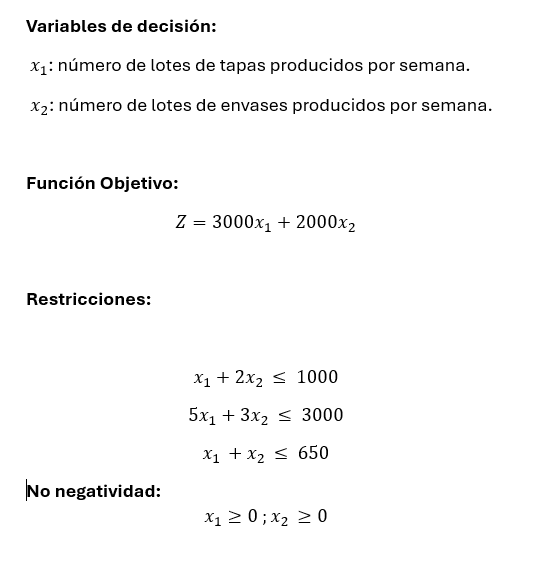

In [2]:
Image("proglin (2).png")

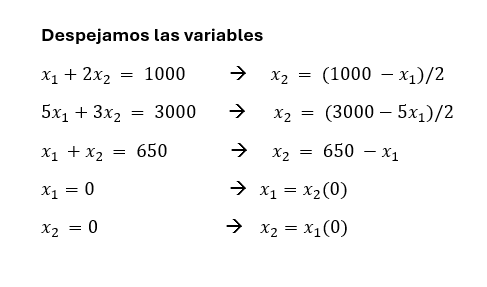

In [3]:
Image("despejar.png")

In [4]:
# Ecuaciones e intervalos para tabular
x = np.arange(-150, 750, 1)
y = np.arange(-200, 1200, 1)
y1 = (1000-x)/2 
y2 = (3000-5*x)/3
y3 = (650-x)
x1 = 0*y
y4 = 0*x

In [5]:
# Identificadores para las líneas
primera_linea = LineString(np.column_stack((x, y1)))
segunda_linea = LineString(np.column_stack((x, y2)))
tercera_linea = LineString(np.column_stack((x, y3)))
cuarta_linea = LineString(np.column_stack((x, y4)))
quinta_linea = LineString(np.column_stack((x1, y)))

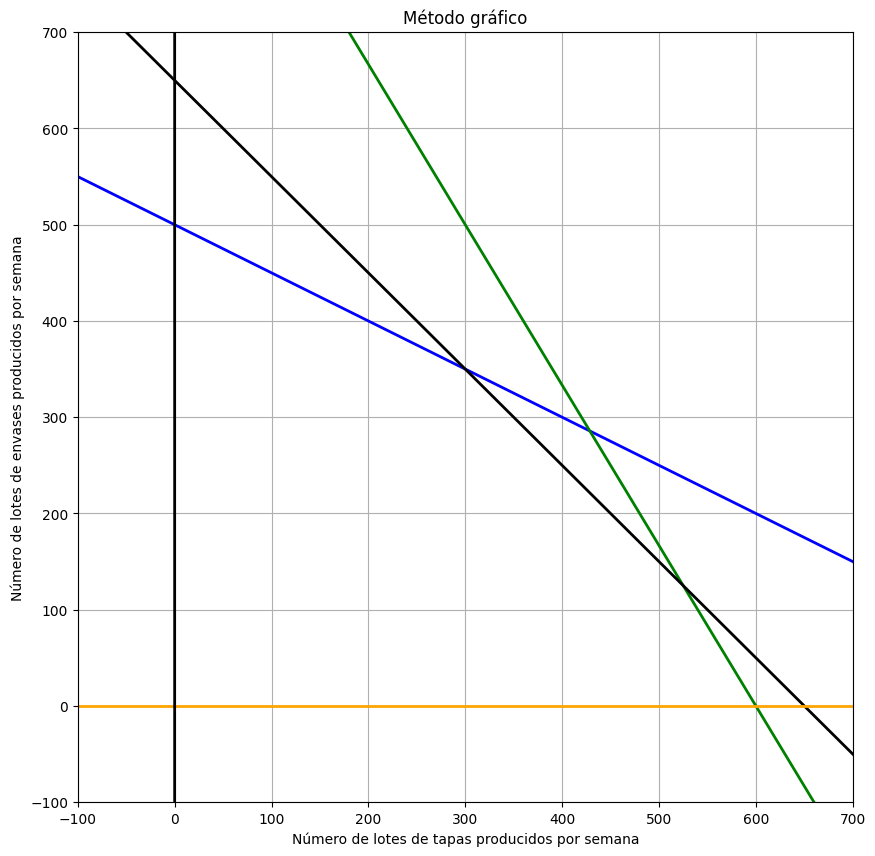

In [6]:
# Graficando las líneas
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x, y4, '-', linewidth=2, color='orange')
plt.plot(x1, y, '-', linewidth=2, color='black')
plt.grid()
plt.xlim(-100,700)
plt.ylim(-100,700)
plt.xlabel('Número de lotes de tapas producidos por semana')
plt.ylabel('Número de lotes de envases producidos por semana')
plt.title('Método gráfico')
plt.show()

---

## Parte B

Obtenga los vértices de la región factible, grafíquelas en el cartesiano e imprima las coordenadas de estos

In [7]:
# Generando las intersecciones (vértices)
primera_interseccion = cuarta_linea.intersection(quinta_linea)
segunda_interseccion = quinta_linea.intersection(primera_linea)
tercera_interseccion = primera_linea.intersection(tercera_linea)
cuarta_interseccion = tercera_linea.intersection(segunda_linea)
quinta_interseccion = segunda_linea.intersection(cuarta_linea)

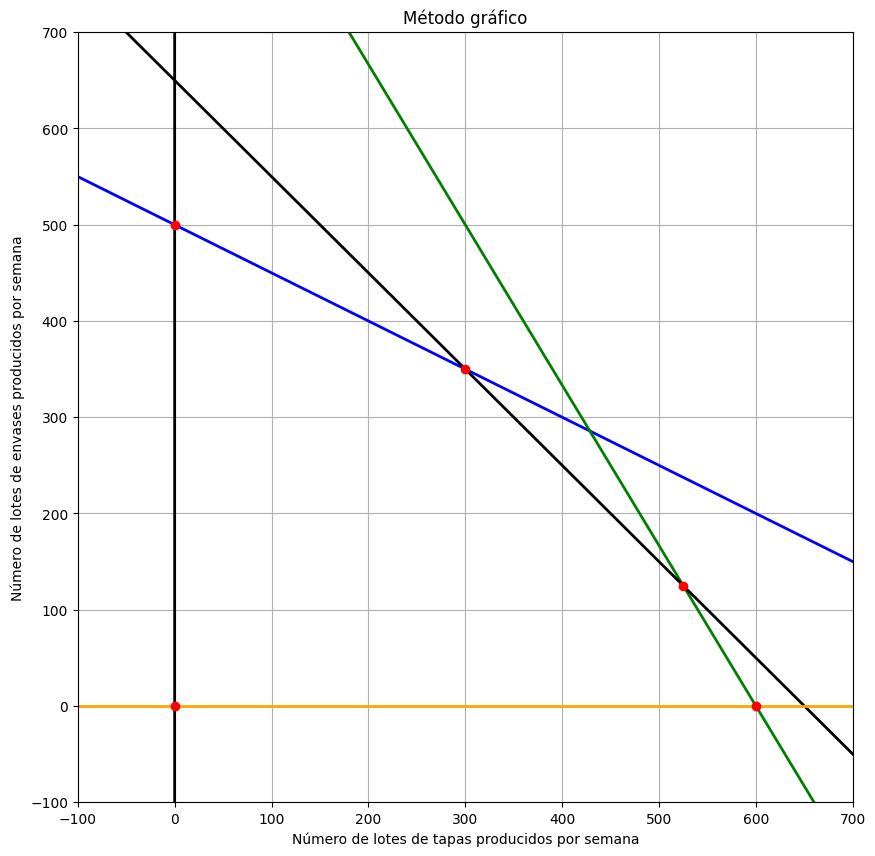

In [8]:
# Graficando los vértices
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x, y4, '-', linewidth=2, color='orange')
plt.plot(x1, y, '-', linewidth=2, color='black')

plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')
plt.plot(*cuarta_interseccion.xy, 'o', color='red')
plt.plot(*quinta_interseccion.xy, 'o', color='red')

plt.grid()
plt.xlim(-100,700)
plt.ylim(-100,700)
plt.xlabel('Número de lotes de tapas producidos por semana')
plt.ylabel('Número de lotes de envases producidos por semana')
plt.title('Método gráfico')
plt.show()

In [9]:
# Imprimiendo las coordenadas de los vértices
print('COORDENADAS DE LAS INTERSECCIONES \n')
print('(x1, y1): {} '.format(primera_interseccion))
print('(x2, y2): {} '.format(segunda_interseccion))
print('(x3, y3): {} '.format(tercera_interseccion))
print('(x4, y4): {} '.format(cuarta_interseccion))
print('(x5, y5): {} '.format(quinta_interseccion))

COORDENADAS DE LAS INTERSECCIONES 

(x1, y1): POINT (0 0) 
(x2, y2): POINT (0 500) 
(x3, y3): POINT (300 350) 
(x4, y4): POINT (525 125) 
(x5, y5): POINT (600 0) 


---

## Parte C
Evalúe a la función objetivo en los vértices de la región factible, imprima la solución óptima junto sus valores para la variable de decisión y grafique la región factible en el plano cartesiano


In [10]:
# Identificando los valores de las coordenadas x e y de cada vértice
xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy
xi4m, yi4m = cuarta_interseccion.xy
xi5m, yi5m = quinta_interseccion.xy

In [11]:
# Cambiamos el formato de matriz a float
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))
xi4 = np.float64(np.array(xi4m))
xi5 = np.float64(np.array(xi5m))
yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))
yi4 = np.float64(np.array(yi4m))
yi5 = np.float64(np.array(yi5m))

In [12]:
# Evaluando la función objetivo en cada vértice
FOi1 = 3000*xi1 + 2000*yi1
FOi2 = 3000*xi2 + 2000*yi2
FOi3 = 3000*xi3 + 2000*yi3
FOi4 = 3000*xi4 + 2000*yi4
FOi5 = 3000*xi5 + 2000*yi5

In [13]:
# Imprimiendo las evaluaciones de la función objetivo en cada vértice
print('EVALUACIÓN DE LA FO EN LOS VÉRTICES \n')
print('f(x1, y1) = {} soles'.format(FOi1))
print('f(x2, y2) = {} soles'.format(FOi2))
print('f(x3, y3) = {} soles'.format(FOi3))
print('f(x4, y4) = {} soles'.format(FOi4))
print('f(x5, y5) = {} soles'.format(FOi5))

EVALUACIÓN DE LA FO EN LOS VÉRTICES 

f(x1, y1) = 0.0 soles
f(x2, y2) = 1000000.0 soles
f(x3, y3) = 1600000.0 soles
f(x4, y4) = 1825000.0 soles
f(x5, y5) = 1800000.0 soles


In [14]:
# Calculando e imprimiendo la solución óptima
z_max = max(FOi1, FOi2, FOi3, FOi4, FOi5)
print('SOLUCIÓN ÓPTIMA \n')
print('z_max = {} soles'.format(z_max))

SOLUCIÓN ÓPTIMA 

z_max = 1825000.0 soles


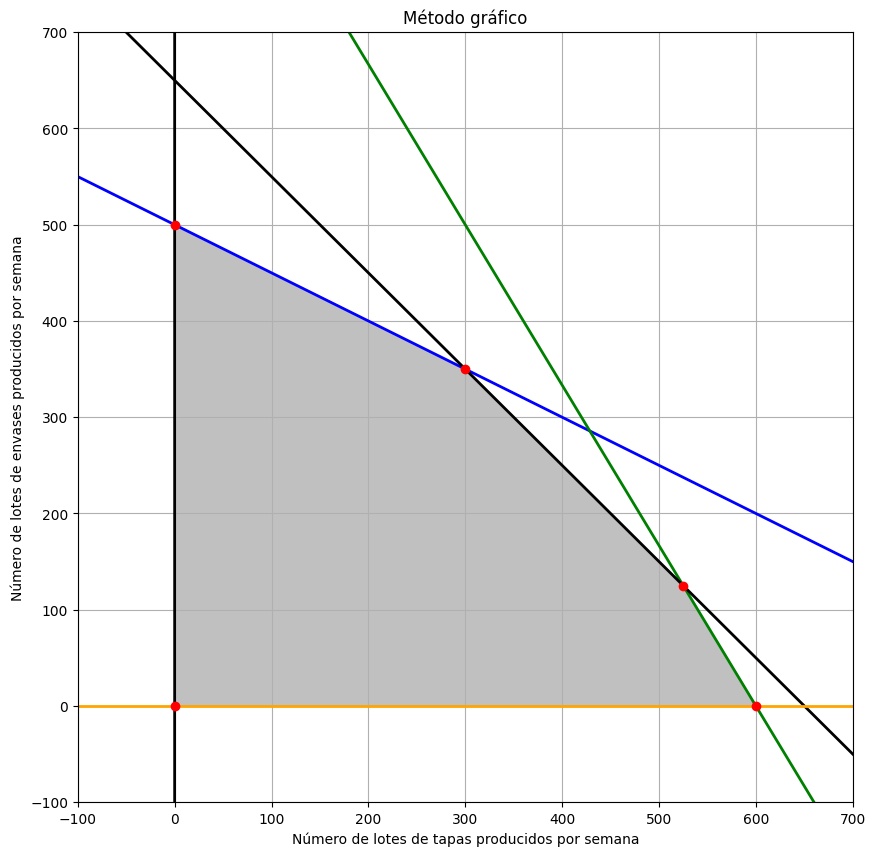

In [15]:
# Graficando la región factible a partir de las coordenadas de los vértices 
m = [xi1, xi2, xi3, xi4, xi5]
n = [yi1, yi2, yi3, yi4, yi5]
plt.figure(figsize=(10,10))
plt.plot(x, y1, '-', linewidth=2, color='blue')
plt.plot(x, y2, '-', linewidth=2, color='green')
plt.plot(x, y3, '-', linewidth=2, color='black')
plt.plot(x, y4, '-', linewidth=2, color='orange')
plt.plot(x1, y, '-', linewidth=2, color='black')
#plt.plot(x, z, ':', linewidth=1, color='k')
plt.plot(*primera_interseccion.xy, 'o', color='red')
plt.plot(*segunda_interseccion.xy, 'o', color='red')
plt.plot(*tercera_interseccion.xy, 'o', color='red')
plt.plot(*cuarta_interseccion.xy, 'o', color='red')
plt.plot(*quinta_interseccion.xy, 'o', color='red')

plt.fill(m, n, color='silver')
plt.grid()
plt.xlim(-100,700)
plt.ylim(-100,700)
plt.xlabel('Número de lotes de tapas producidos por semana')
plt.ylabel('Número de lotes de envases producidos por semana')
plt.title('Método gráfico')
plt.show()

In [16]:
# Imprimiendo las coordenadas del vértice de la solución óptima
dict1 = {0:FOi1, 1:FOi2, 2:FOi3, 3:FOi4, 4:FOi5}
posicion = max(dict1, key=dict1.get)

x_max = m[posicion]
y_max = n[posicion]

print('VARIABLES DE DECISIÓN DE LA SOLUCIÓN ÓPTIMA \n')
print('Número de lotes de tapas producidos por semana: {} '.format(x_max))
print('Número de lotes de envases producidos por semana: {} '.format(y_max))

VARIABLES DE DECISIÓN DE LA SOLUCIÓN ÓPTIMA 

Número de lotes de tapas producidos por semana: 525.0 
Número de lotes de envases producidos por semana: 125.0 
